## DSCI 632 - Final Project

### Module submission group
- Group member 1
    - Name: Dhrumil Patel
    - Email: dp3276@drexel.edu
- Group member 2
    - Name: Abraham,Jeromey
    - Email: jja99@drexel.edu
- Group member 3
    - Name: Sharfudeen,Mohamed Shehaf Aakil
    - Email: ms5475@drexel.edu

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,isnan, when, count
spark=SparkSession.builder.appName('Covid').getOrCreate()

In [43]:
# create a SparkSession
spark = SparkSession.builder.appName('C-19').getOrCreate()

# read the data file, with header option set to true
df = spark.read.csv('CovidData.csv', header=True)

# show the first few rows of the data
df.show(5)


+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE| DATE_DIED|INTUBED|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|
+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|    2|           1|  1|           1|03/05/2020|     97|        1| 65|       2|       2|   2|     2|      2|           1|            2|             2|      2|            2|      2|                   3| 97|
|    2|           1|  2|           1|03/06/2020|     97|        1| 72|      97|       2|   2|     2|      2|           1|            2|             2|      1|            1|    

In [26]:
df.columns

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'DATE_DIED',
 'INTUBED',
 'PNEUMONIA',
 'AGE',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL',
 'ICU']

In [27]:
# import pandas as pd
# df = pd.read_csv('CovidData.csv')

In [44]:
for i in ('USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU'):
    df.groupBy(i).count().show()


+-----+------+
|USMER| count|
+-----+------+
|    1|385672|
|    2|662903|
+-----+------+



+------------+------+
|MEDICAL_UNIT| count|
+------------+------+
|           3| 19175|
|           1|   151|
|           4|314405|
|           2|   169|
|           7|   891|
|           8| 10399|
|           5|  7244|
|           6| 40584|
|           9| 38116|
|          11|  5577|
|          10|  7873|
|          12|602995|
|          13|   996|
+------------+------+

+---+------+
|SEX| count|
+---+------+
|  1|525064|
|  2|523511|
+---+------+



+------------+------+
|PATIENT_TYPE| count|
+------------+------+
|           1|848544|
|           2|200031|
+------------+------+



+----------+-----+
| DATE_DIED|count|
+----------+-----+
|28/03/2020|   39|
|19/01/2020|   12|
|23/11/2020|    2|
|07/03/2020|   10|
|04/01/2020|    1|
|25/02/2020|   16|
|08/11/2020|    3|
|15/01/2020|   22|
|13/02/2020|   14|
|18/01/2020|   23|
|06/01/2020|    3|
|01/03/2020|   11|
|05/07/2020|  897|
|17/08/2020|   19|
|04/08/2020|   93|
|07/02/2020|   17|
|24/08/2020|   12|
|31/01/2021|    2|
|01/04/2020|   56|
|04/04/2020|   77|
+----------+-----+
only showing top 20 rows

+-------+------+
|INTUBED| count|
+-------+------+
|     99|  7325|
|     97|848544|
|      1| 33656|
|      2|159050|
+-------+------+



+---------+------+
|PNEUMONIA| count|
+---------+------+
|       99| 16003|
|        1|140038|
|        2|892534|
+---------+------+



+---+-----+
|AGE|count|
+---+-----+
| 51|19003|
|  7| 2405|
| 54|16291|
| 15| 3517|
| 11| 2535|
|101|   25|
| 29|25134|
| 69| 6256|
| 42|22223|
| 73| 4945|
| 87| 1369|
| 64| 8808|
|  3| 2559|
| 30|27010|
| 34|24872|
| 59|13279|
|  8| 2444|
| 28|25313|
| 22|12689|
| 85| 1786|
+---+-----+
only showing top 20 rows

+--------+------+
|PREGNANT| count|
+--------+------+
|      98|  3754|
|      97|523511|
|       1|  8131|
|       2|513179|
+--------+------+

+--------+------+
|DIABETES| count|
+--------+------+
|      98|  3338|
|       1|124989|
|       2|920248|
+--------+------+

+----+-------+
|COPD|  count|
+----+-------+
|  98|   3003|
|   1|  15062|
|   2|1030510|
+----+-------+

+------+-------+
|ASTHMA|  count|
+------+-------+
|    98|   2979|
|     1|  31572|
|     2|1014024|
+------+-------+

+-------+-------+
|INMSUPR|  count|
+-------+-------+
|     98|   3404|
|      1|  14170|
|      2|1031001|
+-------+-------+

+------------+------+
|HIPERTENSION| count|
+------------+---

+--------------+-------+
|CARDIOVASCULAR|  count|
+--------------+-------+
|            98|   3076|
|             1|  20769|
|             2|1024730|
+--------------+-------+



+-------+------+
|OBESITY| count|
+-------+------+
|     98|  3032|
|      1|159816|
|      2|885727|
+-------+------+

+-------------+-------+
|RENAL_CHRONIC|  count|
+-------------+-------+
|           98|   3006|
|            1|  18904|
|            2|1026665|
+-------------+-------+



+-------+------+
|TOBACCO| count|
+-------+------+
|     98|  3220|
|      1| 84376|
|      2|960979|
+-------+------+



+---+------+
|ICU| count|
+---+------+
| 99|  7488|
| 97|848544|
|  1| 16858|
|  2|175685|
+---+------+



In [45]:
from pyspark.sql.functions import when

# Replace values in INTUBED column
df = df.withColumn('INTUBED', when(df['INTUBED'] == 97, 2).otherwise(df['INTUBED']))
df = df.withColumn('INTUBED', when(df['INTUBED'] == 99, 1).otherwise(df['INTUBED']))

# Replace values in ICU column
df = df.withColumn('ICU', when(df['ICU'] == 97, 2).otherwise(df['ICU']))
df = df.withColumn('ICU', when(df['ICU'] == 99, 1).otherwise(df['ICU']))

# Replace values in PREGNANT column
df = df.withColumn('PREGNANT', when(df['PREGNANT'] == 97, 2).otherwise(df['PREGNANT']))
df = df.withColumn('PREGNANT', when(df['PREGNANT'] == 98, 1).otherwise(df['PREGNANT']))

# Replace values in PNEUMONIA column
df = df.withColumn('PNEUMONIA', when(df['PNEUMONIA'] == 99, 2).otherwise(df['PNEUMONIA']))

# Replace values in other columns
for i in ('DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
          'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
          'RENAL_CHRONIC', 'TOBACCO'):
    df = df.withColumn(i, when(df[i] == 98, 2).otherwise(df[i]))

# Create a new column DEATH based on DATE_DIED
from pyspark.sql.functions import when

df = df.withColumn('DEATH', when(df['DATE_DIED'] == '9999-99-99', 2).otherwise(1))
y= df.DEATH
df = df.drop('DATE_DIED')


In [49]:
from pyspark.sql.functions import col

# Convert string columns to numeric columns
for col_name in ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']:
    df = df.withColumn(col_name, col(col_name).cast('double'))


### EDA

<AxesSubplot:xlabel='AGE', ylabel='count'>

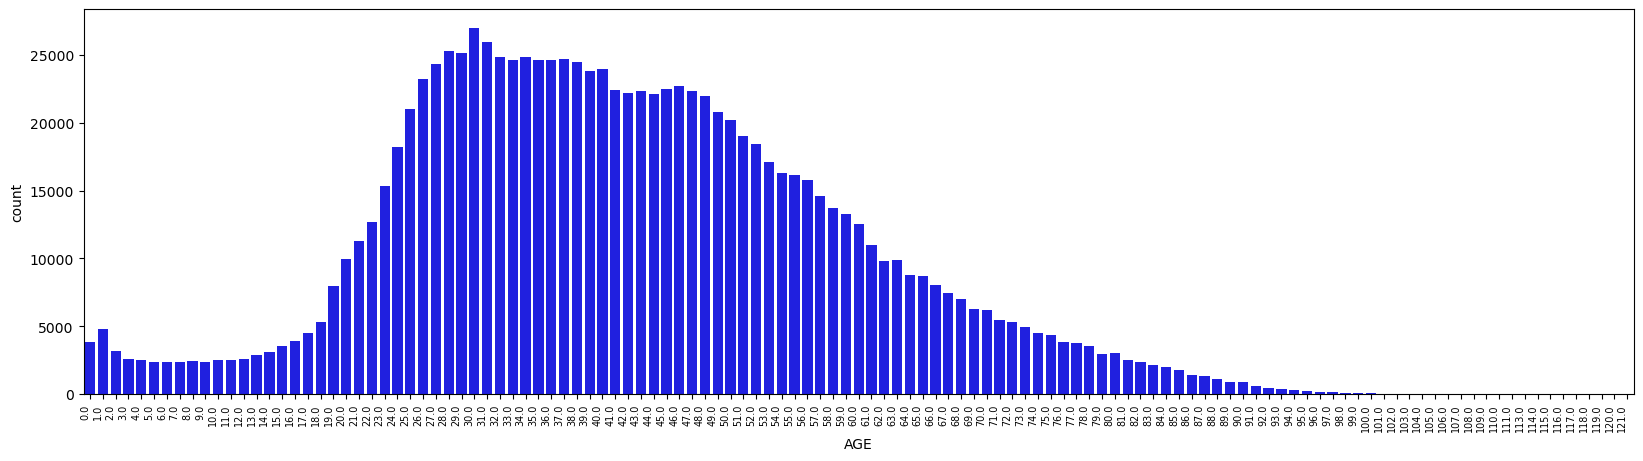

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
plt.xticks(rotation=90, horizontalalignment='right',fontweight='light',fontsize='x-small' )
sns.countplot(x='AGE', data=df.toPandas(), color='blue')

<AxesSubplot:>

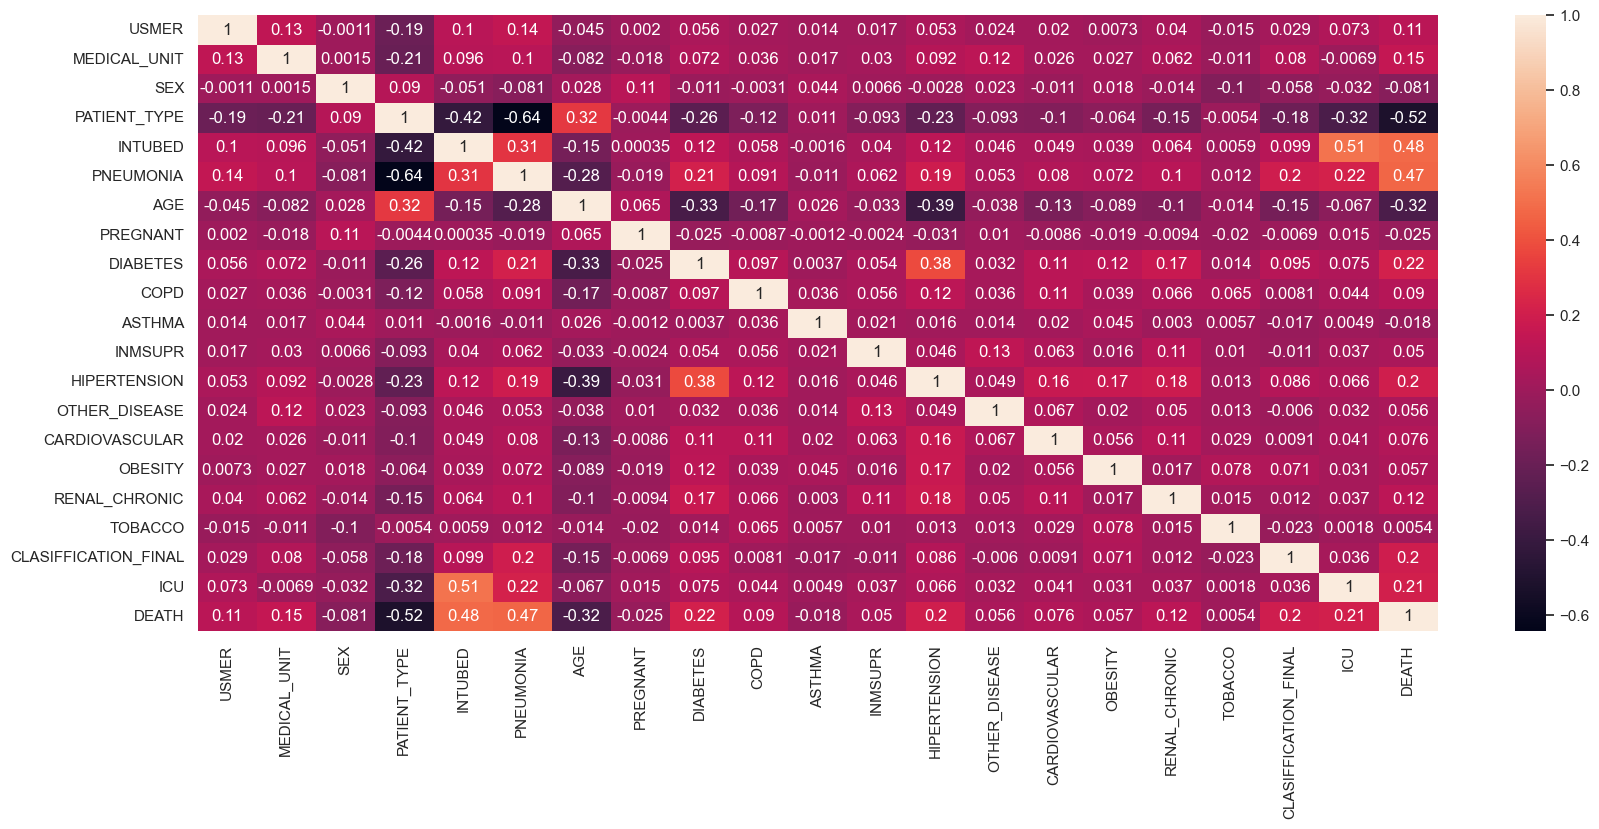

In [88]:
import seaborn as sns
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
pdf = df.toPandas()

# Create a correlation matrix
corr_matrix = pdf.corr()


sns.set(rc={'figure.figsize':(20,8)})
# Create the heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True)

In [36]:
from pyspark.ml.feature import VectorAssembler

In [50]:
feature_cols = [x for x in df.columns if x != 'DEATH']
print(feature_cols)
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

covid_features = assembler.transform(df)

['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']


In [53]:
covid_features.show(5)

23/03/12 18:33:01 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+-----+------------+---+------------+-------+---------+----+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+-----+--------------------+
|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE|INTUBED|PNEUMONIA| AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|DEATH|            features|
+-----+------------+---+------------+-------+---------+----+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+-----+--------------------+
|  2.0|         1.0|1.0|         1.0|    2.0|      1.0|65.0|     2.0|     2.0| 2.0|   2.0|    2.0|         1.0|          2.0|           2.0|    2.0|   

In [54]:
from pyspark.ml.feature import StringIndexer

In [56]:
# This step is the same as label encoder in sklearn
indexer = StringIndexer(inputCol='DEATH', outputCol='label')
index_model = indexer.fit(covid_features)
covid_input = index_model.transform(covid_features).select("features", "label")
covid_input.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[2.0,1.0,1.0,1.0,...|  1.0|
|[2.0,1.0,2.0,1.0,...|  1.0|
|[2.0,1.0,2.0,2.0,...|  1.0|
|[2.0,1.0,1.0,1.0,...|  1.0|
|[2.0,1.0,2.0,1.0,...|  1.0|
+--------------------+-----+
only showing top 5 rows



In [57]:
train, test = covid_input.randomSplit([0.7, 0.3], seed = 1)

print(train.count(), test.count())

734109 314466


## Random Forest Classifier

In [58]:
from pyspark.ml.classification import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(featuresCol='features', labelCol='label')
rfModel = rf.fit(train)

23/03/12 18:36:16 WARN MemoryStore: Not enough space to cache rdd_978_5 in memory! (computed 13.7 MiB so far)
23/03/12 18:36:16 WARN MemoryStore: Not enough space to cache rdd_978_2 in memory! (computed 5.8 MiB so far)
23/03/12 18:36:17 WARN MemoryStore: Not enough space to cache rdd_978_1 in memory! (computed 13.7 MiB so far)
23/03/12 18:36:17 WARN MemoryStore: Not enough space to cache rdd_978_4 in memory! (computed 20.5 MiB so far)
23/03/12 18:36:17 WARN MemoryStore: Not enough space to cache rdd_978_6 in memory! (computed 20.5 MiB so far)
23/03/12 18:36:17 WARN MemoryStore: Not enough space to cache rdd_978_3 in memory! (computed 9.0 MiB so far)
23/03/12 18:36:17 WARN BlockManager: Persisting block rdd_978_6 to disk instead.
23/03/12 18:36:17 WARN BlockManager: Persisting block rdd_978_2 to disk instead.
23/03/12 18:36:17 WARN BlockManager: Persisting block rdd_978_5 to disk instead.
23/03/12 18:36:17 WARN BlockManager: Persisting block rdd_978_1 to disk instead.
23/03/12 18:36:17 

In [60]:
prediction = rfModel.transform(test)

In [61]:
prediction.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[1.0,2.0,1.0,1.0,...|  0.0|[19.6354010732153...|[0.98177005366076...|       0.0|
|[1.0,2.0,1.0,1.0,...|  0.0|[19.6354010732153...|[0.98177005366076...|       0.0|
|[1.0,2.0,1.0,2.0,...|  0.0|[16.9471766488164...|[0.84735883244082...|       0.0|
|[1.0,2.0,1.0,2.0,...|  0.0|[16.9471766488164...|[0.84735883244082...|       0.0|
|[1.0,2.0,1.0,2.0,...|  0.0|[16.9471766488164...|[0.84735883244082...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [62]:
prediction_rdd = prediction.select("prediction", "label").rdd.map(tuple)
prediction_rdd.take(5)

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]

In [63]:
from pyspark.mllib.evaluation import MulticlassMetrics

metrics = MulticlassMetrics(prediction_rdd)
metrics.accuracy

/Volumes/Storage2/Software/anaconda3/lib/python3.9/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


0.9459591815967386

### Accuracy, Precision, Recall and F1-score for Random Forest Classifier

In [74]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# assume that `predictions` is a DataFrame with columns `label` and `prediction`
# where `label` is the true label and `prediction` is the predicted label

# initialize metrics object
metrics = MulticlassMetrics(prediction_rdd)

# get confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()

# print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix)

# get evaluation metrics
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction')
accuracy = evaluator.evaluate(prediction, {evaluator.metricName: 'accuracy'})
precision = evaluator.evaluate(prediction, {evaluator.metricName: 'weightedPrecision'})
recall = evaluator.evaluate(prediction, {evaluator.metricName: 'weightedRecall'})
f1_score = evaluator.evaluate(prediction, {evaluator.metricName: 'f1'})

# print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)


Confusion Matrix:
[[289769.   1692.]
 [ 15302.   7703.]]


Accuracy: 0.9459591815967386
Precision: 0.9403355456558027
Recall: 0.9459591815967386
F1-Score: 0.9352254179866101


## SVM Classifier

In [64]:
from pyspark.ml.classification import LinearSVC

In [75]:
# Create a LinearSVC object
svm = LinearSVC(featuresCol='features', labelCol='label')

In [77]:
svm_model = svm.fit(train)

# Make predictions on the test data
svm_predictions = svm_model.transform(test)

evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='label')
auc = evaluator.evaluate(svm_predictions)

# Print the AUC score
print('AUC: %.3f' % auc)

AUC: 0.955


### Accuracy, Precision, Recall and F1-score for SVM Classifier

In [78]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# assume that `predictions` is a DataFrame with columns `label` and `prediction`
# where `label` is the true label and `prediction` is the predicted label

# convert DataFrame to RDD
predictionAndLabels = svm_predictions.select(['label', 'prediction']).rdd

# initialize metrics object
metrics = MulticlassMetrics(prediction_rdd)

# get confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()

# print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix)

# get evaluation metrics
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction')
accuracy = evaluator.evaluate(svm_predictions, {evaluator.metricName: 'accuracy'})
precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: 'weightedPrecision'})
recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: 'weightedRecall'})
f1_score = evaluator.evaluate(svm_predictions, {evaluator.metricName: 'f1'})

# print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)


Confusion Matrix:
[[289769.   1692.]
 [ 15302.   7703.]]


Accuracy: 0.9419778290816814
Precision: 0.9331370306991228
Recall: 0.9419778290816814
F1-Score: 0.9335347903602993


## Logistic Regression Classifier

In [68]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import numpy as np

lr = LogisticRegression(maxIter = 10)

paramGrid_lr = ParamGridBuilder() \
    .addGrid(lr.regParam, np.linspace(0.3, 0.01, 10)) \
    .addGrid(lr.elasticNetParam, np.linspace(0.3, 0.8, 6)) \
    .build()
crossval_lr = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid_lr,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds= 5)  
cvModel_lr = crossval_lr.fit(train)
best_model_lr = cvModel_lr.bestModel.summary

23/03/12 18:45:15 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/03/12 18:45:15 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


23/03/12 18:58:22 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 293002 ms exceeds timeout 120000 ms
23/03/12 18:58:22 WARN SparkContext: Killing executors is not supported by current scheduler.


23/03/12 19:15:46 WARN Executor: Issue communicating with driver in heartbeater
java.lang.NullPointerException
	at org.apache.spark.storage.memory.MemoryStore.getSize(MemoryStore.scala:133)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$getCurrentBlockStatus(BlockManager.scala:890)
	at org.apache.spark.storage.BlockManager.$anonfun$reportAllBlocks$3(BlockManager.scala:625)
	at org.apache.spark.storage.BlockManager.$anonfun$reportAllBlocks$3$adapted(BlockManager.scala:624)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at org.apache.spark.storage.BlockManager.reportAllBlocks(BlockManager.scala:624)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:644)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1057)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor

In [69]:
best_model_lr.predictions.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[1.0,2.0,1.0,1.0,...|  0.0|[6.06146833821667...|[0.99767444509922...|       0.0|
|[1.0,2.0,1.0,1.0,...|  0.0|[5.78055704743594...|[0.99692250488666...|       0.0|
|[1.0,2.0,1.0,1.0,...|  0.0|[5.74576500935583...|[0.99681389528406...|       0.0|
|[1.0,2.0,1.0,1.0,...|  0.0|[5.71097297127573...|[0.99670146536151...|       0.0|
|[1.0,2.0,1.0,1.0,...|  0.0|[4.52031871813248...|[0.98923166559012...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [70]:
predictions_lr = cvModel_lr.transform(test)

In [71]:
predictions_lr.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[1.0,2.0,1.0,1.0,...|  0.0|[5.67618093319562...|[0.99658508165074...|       0.0|
|[1.0,2.0,1.0,1.0,...|  0.0|[5.64138889511552...|[0.99646460608597...|       0.0|
|[1.0,2.0,1.0,2.0,...|  0.0|[2.24303833355924...|[0.90404834209288...|       0.0|
|[1.0,2.0,1.0,2.0,...|  0.0|[2.13866221931893...|[0.89460454137800...|       0.0|
|[1.0,2.0,1.0,2.0,...|  0.0|[1.92990999083830...|[0.87323945689073...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [72]:
predictions_lr.groupBy('label','prediction').count().show()

+-----+----------+------+
|label|prediction| count|
+-----+----------+------+
|  1.0|       1.0| 10232|
|  0.0|       1.0|  3744|
|  1.0|       0.0| 12773|
|  0.0|       0.0|287717|
+-----+----------+------+



### Accuracy, Precision, Recall and F1-score for Logistic Regression Classifier

In [73]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# assume that `predictions` is a DataFrame with columns `label` and `prediction`
# where `label` is the true label and `prediction` is the predicted label

# convert DataFrame to RDD
predictionAndLabels = predictions_lr.select(['label', 'prediction']).rdd

# initialize metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# get confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()

# print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix)

# get evaluation metrics
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction')
accuracy = evaluator.evaluate(predictions_lr, {evaluator.metricName: 'accuracy'})
precision = evaluator.evaluate(predictions_lr, {evaluator.metricName: 'weightedPrecision'})
recall = evaluator.evaluate(predictions_lr, {evaluator.metricName: 'weightedRecall'})
f1_score = evaluator.evaluate(predictions_lr, {evaluator.metricName: 'f1'})

# print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)


Confusion Matrix:
[[287717.  12773.]
 [  3744.  10232.]]


Accuracy: 0.9474760387450472
Precision: 0.9410048744158379
Recall: 0.9474760387450472
F1-Score: 0.9414646857997405
